In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import imghdr

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
data_dir = 'data2'

In [5]:
os.path.join(data_dir, 'image_class')

'data2\\image_class'

In [6]:
image_files = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    print(image_class)

capybara
coconut


In [8]:
for image_class in os.listdir(data_dir): # Coconuts and Capyabras
    for image in os.listdir(os.path.join(data_dir, image_class)): # Images in each folder
        image_path = os.path.join(data_dir, image_class, image)
#         print(image_path)
        try:
            img = cv.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_files:
                print(f'Image is not in image_files list {image_path}')
                os.remove(image_path)
        except Exception as e:
#             print(e)
            print('Issued with this image', image_path)

In [9]:
# img = cv.imread(os.path.join('data2', 'capybara', 'a.jpg'))
# plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(img)

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data2')

Found 394 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator() # iterator object (.as_numpy_iterator() makes it iterable)

In [12]:
batch = data_iterator.next()

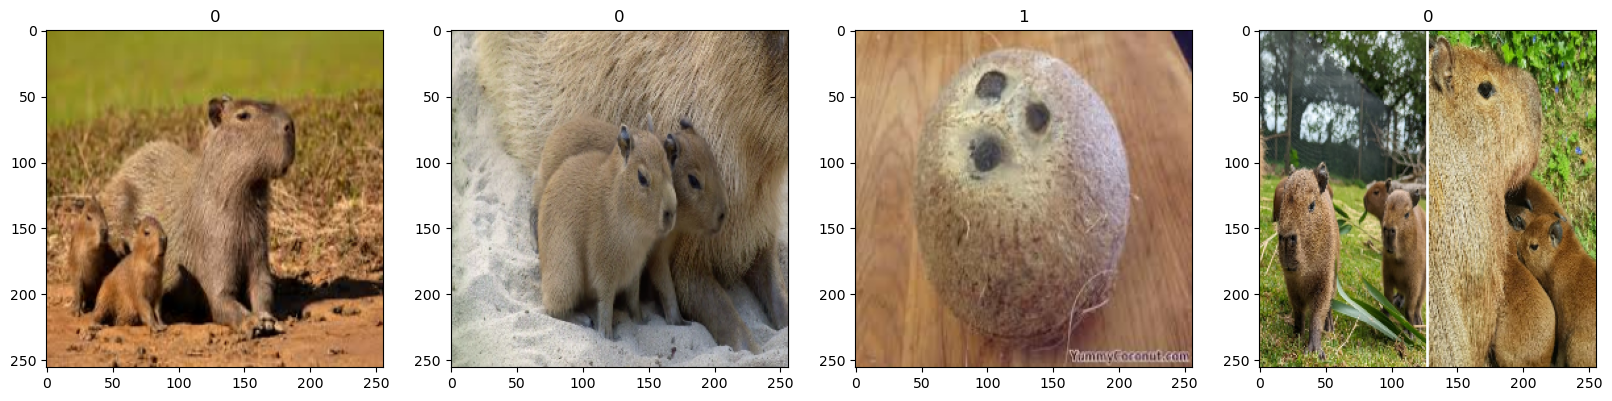

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int)) # imshow() is a matplotlib function which requires image data format to be integer or float
    ax[index].title.set_text(batch[1][index])

In [14]:
data = data.map(lambda x, y: (x/255, y)) # reduces image size as it is easy and fast for model to learn

# Scale data

In [15]:
# data.as_numpy_iterator().next()[0].shape
data.as_numpy_iterator().next()[0].max()

1.0

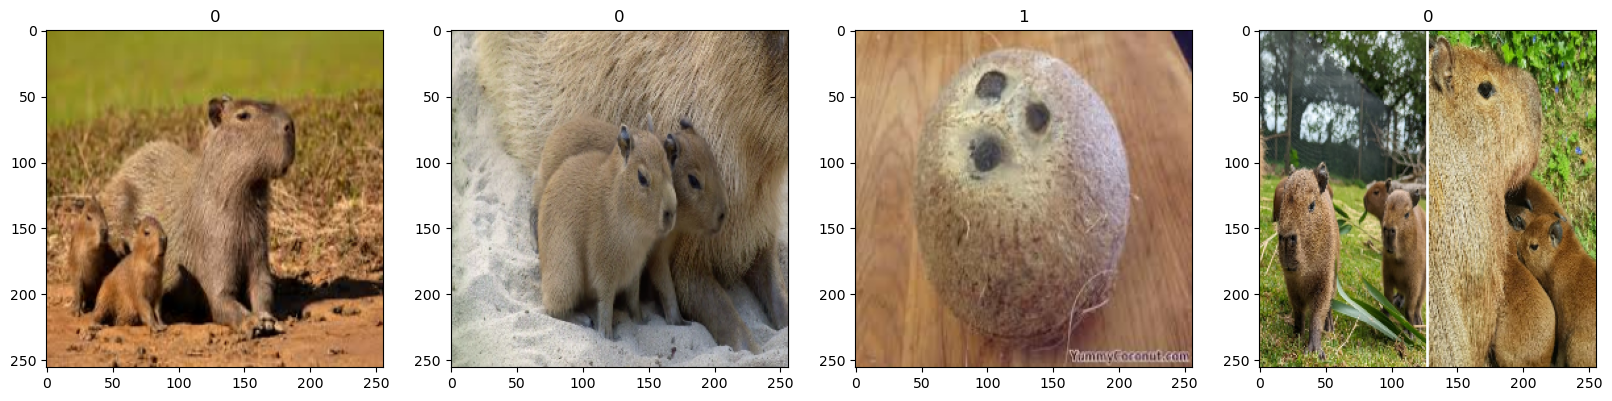

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int)) # imshow() is a matplotlib function which requires image data format to be integer or float
    ax[index].title.set_text(batch[1][index])

# Split data

In [17]:
len(data) # number of batch

13

In [18]:
train_size = int((len(data)*0.7))
val_size = int((len(data)*0.3)) # validate ตรวจสอบความถูกต้อง
test_size = int((len(data)*0.1))

In [19]:
train_size+val_size+test_size

13

# allocate data

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + test_size).take(test_size)

# Build Deep Learning Model

In [21]:
from tensorflow.keras.models import Sequential # Sequential model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

# neural network architecture

In [23]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
          
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
          
model.add(Flatten())
          
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [26]:
logdir = 'log'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 15s 363ms/step - loss: 0.7568 - accuracy: 0.4757 - val_loss: 0.6813 - val_accuracy: 0.7812
Epoch 2/20
9/9 [==============================] - 4s 245ms/step - loss: 0.6614 - accuracy: 0.6597 - val_loss: 0.6063 - val_accuracy: 0.6562
Epoch 3/20
9/9 [==============================] - 3s 235ms/step - loss: 0.5863 - accuracy: 0.6840 - val_loss: 0.5209 - val_accuracy: 0.7917
Epoch 4/20
9/9 [==============================] - 3s 241ms/step - loss: 0.5187 - accuracy: 0.7778 - val_loss: 0.3738 - val_accuracy: 0.8646
Epoch 5/20
9/9 [==============================] - 3s 235ms/step - loss: 0.4770 - accuracy: 0.7882 - val_loss: 0.5591 - val_accuracy: 0.6250
Epoch 6/20
9/9 [==============================] - 3s 236ms/step - loss: 0.4079 - accuracy: 0.8576 - val_loss: 0.3535 - val_accuracy: 0.9062
Epoch 7/20
9/9 [==============================] - 3s 249ms/step - loss: 0.2886 - accuracy: 0.8785 - val_loss: 0.2431 - val_accuracy: 0.9167
Epoch 8/20
9/9 [===

# Plot Performance

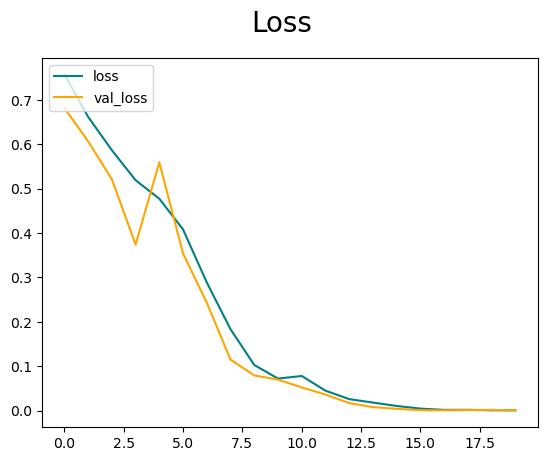

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

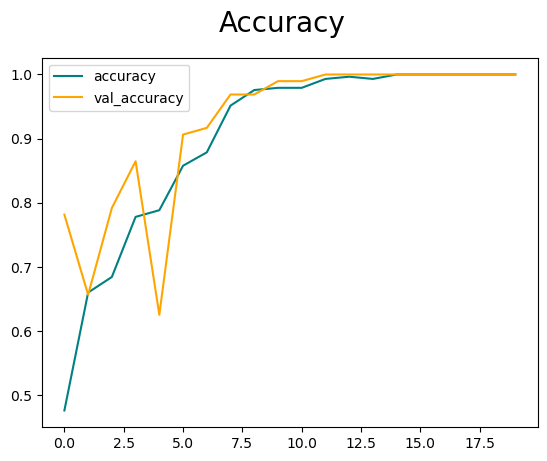

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 177ms/step


In [34]:
print(f'Precision: {pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


In [35]:
img_path = 'data2\\capybara\\shutterstock_1066405223.jpg'

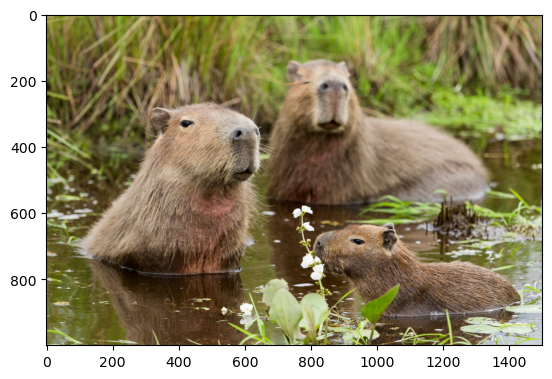

In [36]:
img = cv.imread(img_path)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

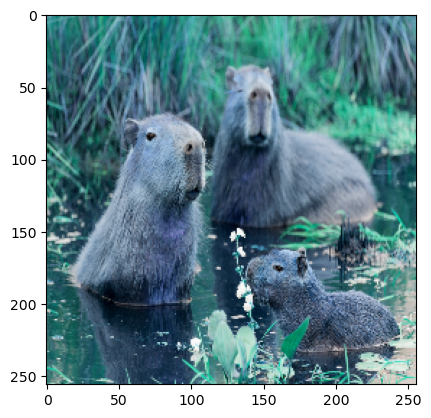

In [37]:
img = tf.image.resize(img, (256, 256))
plt.imshow(img.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 [==============================] - 0s 471ms/step


In [39]:
yhat

array([[7.23773e-05]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is Coconut')
else:
    print(f'Predicted class is Capybara')

Predicted class is Capybara


# Save the model

In [76]:
from tensorflow.keras.models import load_model

In [78]:
model.save(os.path.join('models','capybara.h5'))

In [ ]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))